# Investigating the Molloy-Reed criterion 

In this document, I wan't to investigate the Molloy-Reed criterion. In particular, I would like to plot the critical bond occupancy probability for the 2- and 3-site clusters in the diamond cycle. 

I would like to see if, at the point of formation (or perhaps just after) of the GCC, the network is predominantly composed of 2- or 3-site nodes. 

I would expect that the 3-site, having a higher degree, would be more likely to be connected to the GCC than the 2-site. However, they are both part of the same cycle, so I am not certain if that changes the theoretical predictions or not. 

Certainly, in the case that the bond occupancy probability, $\phi$, is 1, then we expect no difference in the attachment probability; since, both sites are connected to the same cluster. However, when it is less than 1, we expect divergence. 

To investigate this situation we need experimental evidence and theoretical prediction. The theoretical aspect is already at hand. We can already determine when a giant component will occur in the 2- and 3-site as well as the entire network alone. 

We will create a synthetic network of nodes that are joined together using the configuration model with diamond motifs. We will have it that the nodes are split into either 2-site containing or 3-site containing sub-groups. However, the number of each subgraph the node is part of is Poisson distributed in each case. In other words, we define the following joint degree distribution.

$$
P(k_{2\text{s}}, k_{3\text{s}}) = e^{-\langle n_{3\text{s}}\rangle}\frac{\langle n_{3\text{s}}\rangle^{k_{3\text{s}}}}{k_{3\text{s}}!}\delta_{k_{2\text{s}},0} + 
e^{-\langle n_{2\text{s}}\rangle}\frac{\langle n_{2\text{s}}\rangle^{k_{2\text{s}}}}{k_{2\text{s}}!}\delta_{k_{3\text{s}},0}\qquad k_{2\text{s}}\in 2\mathbb Z
$$

A node will hence be given a Poisson distributed number of 3-sites as long as the 2-site degree is zero and vice versa. The 3-site degree need not be even, it may well be odd. However, the 2-site degree, $k_{2\text{s}}$ must be an even number. The mean of the Poisson distribution is $\langle n_x\rangle$ for site $x\in \{2\text{s},3\text{s}\}$.

Now, we create the experimental network, run percolation a bunch of times at various $\phi$ values and then plot the fraction of the network in the GCC (as usual) and the make-up of that fraction in terms of the 2-site and the 3-site nodes. 

For the experiment to be fair, we must ensure that the numbers of each node-types are fixed an equal to one another. Additionally, we must set the Poisson mean number of cycles equal for both sites in the cycle. 

# Expectations

I would like to show that the make-up of the GCC consists of more 3-site nodes than 2-site ones on average. I would then like to plot the Molloy-Reed criterion for the overall network, and the individual site-types. Theory gives us two brackets, hence, we get two conditions (and a mixed condition). 

It would be enough to show that the condition for the 2-site component existing was higher (mathematically) than the 3-site. This could be done for the case when $\phi=1$. I think in the experiment above, it is fair to say that 

$$
\frac{\langle n_{2\text{s}}^2-n_{2\text{s}}\rangle}{\langle n_{2\text{s}}\rangle } =\frac{\langle n_{3\text{s}}^2-n_{3\text{s}}\rangle}{\langle n_{3\text{s}}\rangle }
$$

since we are setting $\langle n_{2\text{s}}\rangle=\langle n_{3\text{s}}\rangle$ and both are Poisson distributed cycle numbers. 

The Molloy-Reed criterion for purely diamond network subgraphs is given by 

$$
      \bigg[2\frac{\langle  n_{2\text{s}}^2\rangle }{\langle  n_{2\text{s}}\rangle} -3\bigg]
      \bigg[3\frac{\langle  n_{3\text{s}}^2\rangle}{\langle n_{3\text{s}}\rangle} -4\bigg] 
      \leq
      6\frac{\langle  n_{2\text{s}} n_{3\text{s}}\rangle^2}{\langle  n_{3\text{s}}\rangle\langle n_{2\text{s}}\rangle} \tag{$\ast$}
$$





Under the precise considerations of our experiment (equal means), the condition becomes 

$$
      \bigg[2\frac{\langle  n^2\rangle }{\langle  n\rangle} -3\bigg]
      \bigg[3\frac{\langle  n^2\rangle}{\langle n\rangle} -4\bigg] 
      \leq
      6\frac{\langle  n^2\rangle^2}{\langle  n\rangle^2} 
$$

and then 


$$
6\frac{\langle  n^2\rangle^2 }{\langle  n\rangle^2} - 8 \frac{\langle  n^2\rangle }{\langle  n\rangle} - 9\frac{\langle  n^2\rangle }{\langle  n\rangle} +12 \leq
      6\frac{\langle  n^2\rangle^2}{\langle  n\rangle^2} 
$$

At the threshold we have equality and hence we remove the common terms.

$$
 - 8 \frac{\langle  n^2\rangle }{\langle  n\rangle} - 9\frac{\langle  n^2\rangle }{\langle  n\rangle} +12 =0
$$

and we have 

$$
-17 \frac{\langle  n^2\rangle }{\langle  n\rangle} + 12 = 0
$$

or 

$$
\frac{\langle  n^2\rangle }{\langle  n\rangle} = \frac {12}{17} \approx 0.70588
$$

Compare this with the usual Molloy-Reed criterion for tree-like edges only 

$$
\frac{\langle  n^2_\bot\rangle }{\langle  n_\bot\rangle} = 2
$$

The only Molloy-Reed criterion has a nice interpretation, you only get a connected GCC in a set of unconnected nodes when each has at least 2 contacts.

The modified condition is saying that each diamond needs to connect to 0.7 other diamonds in order to get a GCC. 

Now, consider each bracket on the left-hand side in equation $(*)$. For equal means we have (essentially) $(2x-3)$ and $(3x-4)$, with $x=\langle n^2\rangle /\langle n\rangle$.



In [14]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [35]:
xs = np.linspace(0.0001,3,500)

In [657]:
s2 = np.array(list(map(lambda x: (2*x-3), xs)))
s3 = np.array(list(map(lambda x: (3*x-4), xs)))
s0 = np.array(list(map(lambda x: (x-2), xs)))


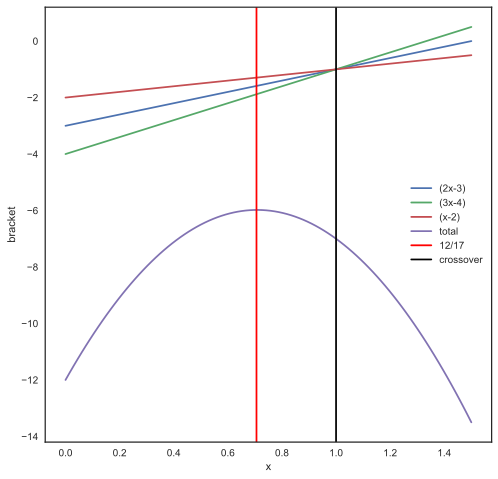

In [658]:
plt.figure(figsize=(8,8))
plt.plot(xs, s2,label='(2x-3)')
plt.plot(xs, s3,label='(3x-4)')
plt.plot(xs, s0,label='(x-2)')

plt.axvline(x=12.0/17.0,label='12/17', color = 'r')
plt.axvline(x=1,label='crossover',color='k')

plt.xlabel('x')
plt.ylabel('bracket')

plt.legend()

The brackets are equal at $x=1$ and also cross over at this point. Below this, the 2-site bracket is larger. This indicates that, below $x=1$, the threshold to meet the criterion is larger in the bracket of the 2-site compared to the 3-site. 

From above we already suspect that in fact the network has a GCC at 12/17~0.7. So, within the range of interest (sub-critical to critical and a short range of super-critical behaviour (0.7 --> 1) ... the threshold for the 2-site is larger than the 3-site. 

Is that logic right?

In [53]:
import numpy
import math
import itertools
from functools import lru_cache as memoise
from scipy.special import binom
from scipy.optimize import fsolve
from scipy.stats import poisson

import networkx
import random
from networkx.generators.random_clustered import random_clustered_graph
import epyc
# for figures in notebook
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import seaborn as sns

/Users/PeterMann/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [303]:
def random_clustered_graph(joint_degree_sequence):
    '''Generate a random graph with the given joint degree sequence of clustered nodes.
    
    :param joint_degree_sequence: (list of integers) 
    :param flag: The cluster type.
    ''' 
    joint_degree_sequence = list(joint_degree_sequence)

    N = len(joint_degree_sequence)
    G = networkx.empty_graph(N)

    clist = []
    c2list = []
    for n in G:
        degrees = joint_degree_sequence[n]
        
        for ccount in range(degrees[0]):
            clist.append(n)
        
        for c2count in range(degrees[1]):
            c2list.append(n)
            
    if (len(clist)%2 != 0 or len(c2list)%2 != 0):
        raise networkx.NetworkXError('Invalid degree sequence')
        
    random.shuffle(clist)
    random.shuffle(c2list)
        
    for i, j in zip(range(len(clist))[0::2],range(len(c2list))[0::2]):
        n1 = clist[i]
        n2 = clist[i+1]
        
        n3 = c2list[j]
        n4 = c2list[j+1]
        G.add_edges_from([(n1,n3), (n3,n2), (n2,n4), (n4,n1),(n3,n4)])
                
    G.name = "random_clustered %d nodes %d edges"%(G.order(), G.size())
    return G

In [304]:
def clustered_network(N, nu, eta):
    '''Generate a network having clustered edge degrees given by Poisson
    distributions with the given means.
    
    :param N: network order
    :param mu: mean number of single edges
    :param nu: mean number of triangles
    :param flag: cluster type (string)
    :returns: a network'''
    (css, c2ss) = (numpy.random.poisson(nu, size=N), numpy.random.poisson(eta, size=N))
    
    (nc, n2c) = (sum(css), sum(c2ss))

    if nc % 2 != 0:
        for j in range(2 - nc % 2):
            i = random.randrange(0, len(css))
            css[i] += 1
            
    if n2c % 2 != 0:
        for j in range(2 - n2c % 2):
            i = random.randrange(0, len(c2ss))
            c2ss[i] += 1
            
    return random_clustered_graph(zip(css, c2ss))

In [437]:
def experimental_percolation(nu, eta):
    '''Perform experimental percolation for vector vec
    and clustering given by flag.'''
    N = 35000
    repetitions = 50

    txs = []
    for rep in range(repetitions):
        g = clustered_network(N, nu, eta)
        gc = max(networkx.connected_components(g), key=len)
        txs.append(len(gc) / g.order())
        
    return numpy.mean(txs)

In [439]:
from joblib import Parallel, delayed
import multiprocessing
from tqdm import tqdm

num_cores = multiprocessing.cpu_count()

S2xs = [] 
means_exp = np.linspace(0.0,0.5,80)

S2xs = Parallel(n_jobs=num_cores)(delayed(experimental_percolation)(m,m) for m in tqdm(means_exp))

100%|██████████| 80/80 [09:31<00:00,  7.15s/it]


In [369]:
def gA_M(T,u2,u3):
    '''subscript represents degree in diamond'''
    return (((u2+(1-u2)*(1-T))**2)*(u3+(1-u3)*(1-T)) - 2*(1-u2)*pow(1-T,2)*u3*u2*pow(T,3)
            -2*(1-u2)*u3*pow(T,2)*(1-u2*pow(T,2))*(1-(1-u2)*T)*(1-T)
            -2*(1-u3)*(1-T)*u2*pow(T,2)*(1-u2*pow(T,2))*(1-(1-u2)*T)
           )

def gB_M(T,u2,u3):
    '''subscript represents degree in diamond'''
    fail = (1-u2*pow(T,2))*(1-(1-u2)*T) # 1
    return ((u3+(1-u3)*(1-T))**2 
            -1*pow(1-T,2)*(1-u3)*u2*u3*pow(T,3)
            -1*(1-u2)*pow(1-T,2)*pow(u3,2)*pow(T,3)
            -1*(1-u2)*u3*pow(T,2)*pow(1-u3*pow(T,2),2)*(1-(1-u3)*T)
            -1*(1-T)*(1-u3)*u3*pow(T,2)*fail
            )

def gA_N(T,u2,u3):
    '''Newman & Karrer 2-site'''
    return (pow(1-T,2) + 2*T*(1-T)*(1-T*(2-T))*u3 + pow(T,2)*(3-2*T)*(1-T*(2-T))*pow(u3,2)
            +2*pow(T,2)*(1-3*T+3*pow(T,2)-pow(T,3))+pow(T,3)*(8-11*T+4*pow(T,2))*u2*pow(u3,2)
           )

def gB_N(T,u2,u3):
    '''Newman & Karrer 3-site'''
    return (pow(1-T,3) + 2*T*(1-T)*(1-T*(2-T))*u2 + pow(T,2)*(1-3*T+3*pow(T,2)-pow(T,3))*pow(u2,2)
            +T*pow(1-T*(2-T),2)*u3 + 2*pow(T,2)*(3-2*T)*(1-T*(2-T))*u2*u3 
            +pow(T,3)*(8-11*T+4*pow(T,2))*pow(u2,2)*u3
        
            )

In [381]:
T = 0.23423
u2 =.87623
u3 =0.78763

In [382]:
gA_M(T,u2,u3), gB_N(T,u2,u3)

(0.8726465105640308, 0.872001025687412)

In [383]:
gB_M(T,u2,u3), gA_N(T,u2,u3)

(0.8901561841431185, 0.8913078722982047)

In [504]:
def gA_M(T,u2,u3):
    '''subscript represents degree in diamond'''
    return (((u2+(1-u2)*(1-T))**2)*(u3+(1-u3)*(1-T))
            -2*(1-u2)*pow(1-T,2)*u3*u2*pow(T,3)
            -2*(1-u2)*u3*pow(T,2)*(1-u2*pow(T,2))*(1-(1-u2)*T)*(1-T)
            -2*(1-u3)*(1-T)*u2*pow(T,2)*(1-u2*pow(T,2))*(1-(1-u2)*T)
           )

def gB_M(T,u2,u3):
    '''subscript represents degree in diamond
    CHANGED THE FAIL PATHS COMPARED TO THE PAPER'''
    fail = (1-(1-u2)*T) # 1
    return ((u3+(1-u3)*(1-T))**2 
            -1*pow(1-T,2)*(1-u3)*u2*u3*pow(T,3)
            -1*(1-u2)*pow(1-T,2)*pow(u3,2)*pow(T,3)
            -1*(1-u2)*u3*pow(T,2)*(1-(1-u3)*T)
            -1*(1-T)*(1-u3)*u3*pow(T,2)*fail
            )

def G0(gA,gB,a,b):
    return math.exp(a*(gA-1))*math.exp(b*(gB-1))

S2s = []    
for m in means_theory:
    #: theory :#
    z2 = 0.5
    z3 = 0.5
    for i in range(150):
        gA = gA_M(1,z2,z3)
        gB = gB_M(1,z2,z3)
        
        z2 = G0(gA,gB,m,m)
        z3 = G0(gA,gB,m,m)
        
    S2s.append(1-G0(gA,gB,m,m))

(0.39044046070698285, 0.39044046070698285)

In [642]:
6/17/4

0.08823529411764706

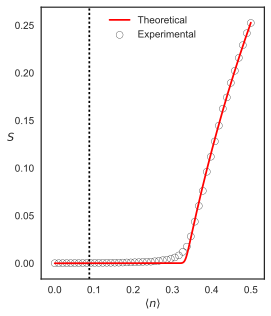

In [650]:
sns.set_style('white')
fig = plt.figure(figsize=(4,5))
ax = fig.gca()
lines = [':', '-.', '--', '-']
colours = ['#0E6292','#056B09', '#C82D07', '#AB8425','0.2']

ax.plot(means_theory,S2s,label='Theoretical',color='r')

ax.scatter(means_exp, S2xs, color=colours[0],facecolors='none', edgecolors='k',label='Experimental')
    
plt.axvline(x = der ,color='k',linestyle=':')
#plt.xlim(0,0.5)
#plt.ylim(0,0.7)
plt.xlabel(r'$\langle n\rangle$')
plt.ylabel(r'$S$',rotation=0)
plt.legend()
#plt.savefig('meandegree.pdf', bbox_inches = 'tight')

In [635]:
def random_clustered_graph(joint_degree_sequence):
    '''Generate a random graph with the given joint degree sequence of clustered nodes.
    
    :param joint_degree_sequence: (list of integers) 
    :param flag: The cluster type.
    ''' 
    joint_degree_sequence = list(joint_degree_sequence)

    N = len(joint_degree_sequence)
    G = networkx.empty_graph(N)

    clist = []
    for n in G:
        degrees = joint_degree_sequence[n]
        
        for ccount in range(degrees):
            clist.append(n)
        
            
    if (len(clist)%4 != 0):
        raise networkx.NetworkXError('Invalid degree sequence')
        
    random.shuffle(clist)
        
    while clist:
        n1 = clist.pop()
        n2 = clist.pop()
        
        n3 = clist.pop()
        n4 = clist.pop()
        G.add_edges_from([(n1,n2), (n2,n3), (n3,n4), (n4,n1),(n3,n1)])
                
    G.name = "random_clustered %d nodes %d edges"%(G.order(), G.size())
    return G

In [636]:
def clustered_network(N, nu):
    '''Generate a network having clustered edge degrees given by Poisson
    distributions with the given means.
    
    :param N: network order
    :param mu: mean number of single edges
    :param nu: mean number of triangles
    :param flag: cluster type (string)
    :returns: a network'''
    (css) = (numpy.random.poisson(nu, size=N))
    
    (nc) = (sum(css))

    if nc % 4 != 0:
        for j in range(4 - nc % 4):
            i = random.randrange(0, len(css))
            css[i] += 1
            
    return random_clustered_graph(css)

In [637]:
def experimental_percolation(nu, eta):
    '''Perform experimental percolation for vector vec
    and clustering given by flag.'''
    N = 70000
    repetitions = 60

    txs = []
    for rep in range(repetitions):
        g = clustered_network(N, nu)
        gc = max(networkx.connected_components(g), key=len)
        txs.append(len(gc) / g.order())
        
    return numpy.mean(txs)

In [638]:
from joblib import Parallel, delayed
import multiprocessing
from tqdm import tqdm

num_cores = multiprocessing.cpu_count()

S2xs = [] 
means_exp = np.linspace(0.0,0.5,50)

S2xs = Parallel(n_jobs=num_cores)(delayed(experimental_percolation)(m,m) for m in tqdm(means_exp))



  0%|          | 0/50 [00:00<?, ?it/s]

  8%|▊         | 4/50 [00:00<00:01, 23.22it/s]

 16%|█▌        | 8/50 [00:50<04:22,  6.26s/it]

 24%|██▍       | 12/50 [01:44<05:32,  8.74s/it]

 32%|███▏      | 16/50 [02:40<05:41, 10.05s/it]

 40%|████      | 20/50 [03:50<05:46, 11.54s/it]

 48%|████▊     | 24/50 [04:55<05:19, 12.29s/it]

 56%|█████▌    | 28/50 [05:55<04:39, 12.69s/it]

 64%|██████▍   | 32/50 [06:57<03:54, 13.03s/it]

 72%|███████▏  | 36/50 [08:00<03:07, 13.36s/it]

 80%|████████  | 40/50 [09:06<02:16, 13.65s/it]

 88%|████████▊ | 44/50 [10:13<01:23, 13.94s/it]

 96%|█████████▌| 48/50 [11:22<00:28, 14.22s/it]

100%|██████████| 50/50 [11:22<00:00, 13.65s/it]

In [639]:
def gA_M(T,u2,u3):
    '''subscript represents degree in diamond'''
    return (((u2+(1-u2)*(1-T))**2)*(u3+(1-u3)*(1-T))
            -2*(1-u2)*pow(1-T,2)*u3*u2*pow(T,3)
            -2*(1-u2)*u3*pow(T,2)*(1-u2*pow(T,2))*(1-(1-u2)*T)*(1-T)
            -2*(1-u3)*(1-T)*u2*pow(T,2)*(1-u2*pow(T,2))*(1-(1-u2)*T)
           )

def gB_M(T,u2,u3):
    '''subscript represents degree in diamond
    CHANGED THE FAIL PATHS COMPARED TO THE PAPER'''
    fail = (1-(1-u2)*T) # 1
    return ((u3+(1-u3)*(1-T))**2 
            -1*pow(1-T,2)*(1-u3)*u2*u3*pow(T,3)
            -1*(1-u2)*pow(1-T,2)*pow(u3,2)*pow(T,3)
            -1*(1-u2)*u3*pow(T,2)*(1-(1-u3)*T)
            -1*(1-T)*(1-u3)*u3*pow(T,2)*fail
            )

def G0(gA,gB,a,b):
    return math.exp(a*(gA-1))*math.exp(b*(gB-1))

S2s = []    
for m in means_theory:
    m = m/2
    #: theory :#
    z2 = 0.5
    z3 = 0.5
    for i in range(150):
        gA = gA_M(1,z2,z3)
        gB = gB_M(1,z2,z3)
        
        z2 = G0(gA,gB,m,m)
        z3 = G0(gA,gB,m,m)
        
    S2s.append(1-G0(gA,gB,m,m))

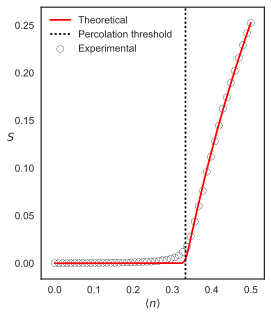

In [640]:
sns.set_style('white')
fig = plt.figure(figsize=(4,5))
ax = fig.gca()
lines = [':', '-.', '--', '-']
colours = ['#0E6292','#056B09', '#C82D07', '#AB8425','0.2']

ax.plot(means_theory,S2s,label='Theoretical',color='r')

ax.scatter(means_exp, S2xs, color=colours[0],facecolors='none', edgecolors='k',label='Experimental')
    
plt.axvline(x = 4/3/4 ,color='k',linestyle=':',label='Percolation threshold')
#plt.xlim(0,0.5)
#plt.ylim(0,0.7)
plt.xlabel(r'$\langle n\rangle$')
plt.ylabel(r'$S$',rotation=0)
plt.legend()
plt.savefig('meandegree.pdf', bbox_inches = 'tight')

In [548]:
3/2/4

0.375

In [549]:
4/3/4

0.3333333333333333

In [550]:
3/2/4 + 4/3/4

0.7083333333333333

In [551]:
0.7083333333333333/2

0.35416666666666663

In [567]:
def clustered_network(N, nu):
    '''Generate a network having clustered edge degrees given by Poisson
    distributions with the given means.
    
    :param N: network order
    :param mu: mean number of single edges
    :param nu: mean number of triangles
    :param flag: cluster type (string)
    :returns: a network'''
    (css) = (numpy.random.poisson(nu, size=N))
    
    (nc) = (sum(css))

    if nc % 4 != 0:
        for j in range(4 - nc % 4):
            i = random.randrange(0, len(css))
            css[i] += 1
            
    return random_clustered_graph(css)

In [570]:
def random_clustered_graph(joint_degree_sequence):
    '''Generate a random graph with the given joint degree sequence of clustered nodes.
    
    :param joint_degree_sequence: (list of integers) 
    :param flag: The cluster type.
    ''' 
    joint_degree_sequence = list(joint_degree_sequence)

    N = len(joint_degree_sequence)
    G = networkx.empty_graph(N)

    clist = []
    for n in G:
        degrees = joint_degree_sequence[n]
        
        for ccount in range(degrees):
            clist.append(n)
        
            
    if (len(clist)%4 != 0):
        raise networkx.NetworkXError('Invalid degree sequence')
        
    random.shuffle(clist)
        
    networkx.set_node_attributes(G, '', 'colour')
    
    while clist:
        
        n1 = clist.pop()
        n2 = clist.pop()
        
        n3 = clist.pop()
        n4 = clist.pop()
        
        # red is 3-site blue is 2-site 
        G.add_edges_from([(n1,n2), (n2,n3), (n3,n4), (n4,n1),(n3,n1)])
        
        G.nodes[n1]['colour'] = G.nodes[n1]['colour'] + 'r'
        G.nodes[n2]['colour'] = G.nodes[n2]['colour'] + 'b'
        G.nodes[n3]['colour'] = G.nodes[n3]['colour'] + 'r'
        G.nodes[n4]['colour'] = G.nodes[n4]['colour'] + 'b'
        
                
    G.name = "random_clustered %d nodes %d edges"%(G.order(), G.size())
    return G

In [571]:
G = clustered_network(8, 23)

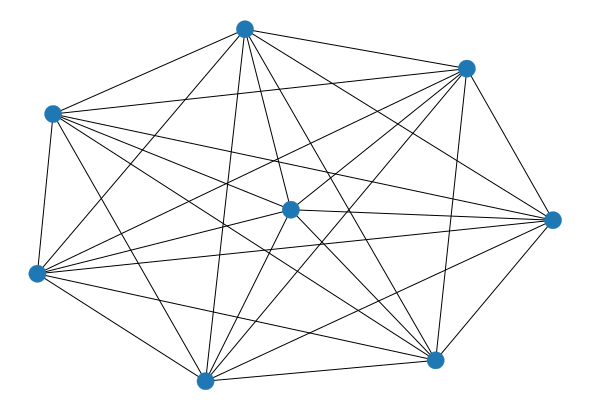

In [576]:
networkx.draw(G)

In [574]:
color=networkx.get_node_attributes(G,'colour')

In [575]:
color

{0: 'brbrbrbbrbbbrbrrbbbbrrb',
 1: 'rbbrbrrbbrbbrbrrrrrbrbrrb',
 2: 'rrbbrrrrrbbrbrbrbrbrrrbbr',
 3: 'rrbrrrrrrbbrbbrrbbrbr',
 4: 'rbbrbrbbbbrrbbrbrbrrbbb',
 5: 'bbbbrbbbrbrrrrbbrbr',
 6: 'brbrbrrrbrbrbbbrb',
 7: 'rbrbrbrrrrbbbbrrbbbrrbr'}

In [609]:
def random_clustered_graph(joint_degree_sequence):
    '''Generate a random graph with the given joint degree sequence of clustered nodes.
    
    :param joint_degree_sequence: (list of integers) 
    :param flag: The cluster type.
    ''' 
    joint_degree_sequence = list(joint_degree_sequence)

    N = len(joint_degree_sequence)
    G = networkx.empty_graph(N)

    clist = []
    for n in G:
        degrees = joint_degree_sequence[n]
        
        for ccount in range(degrees):
            clist.append(n)
        
            
    if (len(clist)%4 != 0):
        raise networkx.NetworkXError('Invalid degree sequence')
        
    random.shuffle(clist)
        
    networkx.set_node_attributes(G, '', 'colour') # node the spellings
    networkx.set_node_attributes(G, '', 'color')
    
    for n in G.nodes():
        if n % 2 == 0:
            G.nodes[n]['color'] = 'red'
        else:
            G.nodes[n]['color'] = 'blue'
        
    while clist:
        n1 = next((x for x in clist if G.nodes[x]['color'] == 'red'), None)
        if n1:
            clist.remove(n1)
        
        n3 = next((x for x in clist if G.nodes[x]['color'] == 'red'), None)
        if n3:
            clist.remove(n3)
        
        n2 = next((x for x in clist if G.nodes[x]['color'] == 'blue'), None)
        if n2:
            clist.remove(n2)
        
        n4 = next((x for x in clist if G.nodes[x]['color'] == 'blue'), None)
        if n4:
            clist.remove(n4)
    
        if n1 is not None and n2 is not None and n3 is not None and n4 is not None:
            
            # red is 3-site blue is 2-site 
            G.add_edges_from([(n1,n2), (n2,n3), (n3,n4), (n4,n1),(n3,n1)])
            
            G.nodes[n1]['colour'] = G.nodes[n1]['colour'] + 'r'
            G.nodes[n2]['colour'] = G.nodes[n2]['colour'] + 'b'
            G.nodes[n3]['colour'] = G.nodes[n3]['colour'] + 'r'
            G.nodes[n4]['colour'] = G.nodes[n4]['colour'] + 'b'
        
        else:
            return G
                  
    G.name = "random_clustered %d nodes %d edges"%(G.order(), G.size())
    return G

In [620]:
G = clustered_network(240, 1)

In [628]:
def experimental_percolation(nu, eta):
    '''Perform experimental percolation for vector vec
    and clustering given by flag.'''
    N = 35000
    repetitions = 50

    txs = []
    for rep in range(repetitions):
        g = clustered_network(N, nu)
        gc = max(networkx.connected_components(g), key=len)
        txs.append(len(gc) / g.order())
        
    return numpy.mean(txs)

In [629]:
from joblib import Parallel, delayed
import multiprocessing
from tqdm import tqdm

num_cores = multiprocessing.cpu_count()

S2xs = [] 
means_exp = np.linspace(0.0,0.5,50)

S2xs = Parallel(n_jobs=num_cores)(delayed(experimental_percolation)(m,m) for m in tqdm(means_exp))



  0%|          | 0/50 [00:00<?, ?it/s]

 16%|█▌        | 8/50 [00:32<02:52,  4.11s/it]

 24%|██▍       | 12/50 [01:07<03:34,  5.65s/it]

 32%|███▏      | 16/50 [01:51<03:55,  6.94s/it]

 40%|████      | 20/50 [02:44<04:06,  8.22s/it]

 48%|████▊     | 24/50 [03:37<03:55,  9.05s/it]

 56%|█████▌    | 28/50 [05:16<04:08, 11.30s/it]

 64%|██████▍   | 32/50 [07:12<04:03, 13.52s/it]

 72%|███████▏  | 36/50 [11:44<04:34, 19.57s/it]

 80%|████████  | 40/50 [17:29<04:22, 26.24s/it]

 88%|████████▊ | 44/50 [26:04<03:33, 35.55s/it]

 96%|█████████▌| 48/50 [32:33<01:21, 40.70s/it]

100%|██████████| 50/50 [32:33<00:00, 39.07s/it]

In [630]:
def gA_M(T,u2,u3):
    '''subscript represents degree in diamond'''
    return (((u2+(1-u2)*(1-T))**2)*(u3+(1-u3)*(1-T))
            -2*(1-u2)*pow(1-T,2)*u3*u2*pow(T,3)
            -2*(1-u2)*u3*pow(T,2)*(1-u2*pow(T,2))*(1-(1-u2)*T)*(1-T)
            -2*(1-u3)*(1-T)*u2*pow(T,2)*(1-u2*pow(T,2))*(1-(1-u2)*T)
           )

def gB_M(T,u2,u3):
    '''subscript represents degree in diamond
    CHANGED THE FAIL PATHS COMPARED TO THE PAPER'''
    fail = (1-(1-u2)*T) # 1
    return ((u3+(1-u3)*(1-T))**2 
            -1*pow(1-T,2)*(1-u3)*u2*u3*pow(T,3)
            -1*(1-u2)*pow(1-T,2)*pow(u3,2)*pow(T,3)
            -1*(1-u2)*u3*pow(T,2)*(1-(1-u3)*T)
            -1*(1-T)*(1-u3)*u3*pow(T,2)*fail
            )

def G0(gA,gB,a,b):
    return math.exp(a*(gA-1))*math.exp(b*(gB-1))

S2s = []    
for m in means_theory:
    m = m/2
    #: theory :#
    z2 = 0.5
    z3 = 0.5
    for i in range(150):
        gA = gA_M(1,z2,z3)
        gB = gB_M(1,z2,z3)
        
        z2 = G0(gA,gB,m,m)
        z3 = G0(gA,gB,m,m)
        
    S2s.append(1-G0(gA,gB,m,m))

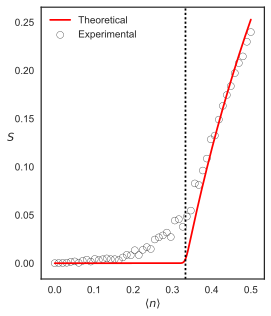

In [631]:
sns.set_style('white')
fig = plt.figure(figsize=(4,5))
ax = fig.gca()
lines = [':', '-.', '--', '-']
colours = ['#0E6292','#056B09', '#C82D07', '#AB8425','0.2']

ax.plot(means_theory,S2s,label='Theoretical',color='r')

ax.scatter(means_exp, S2xs, color=colours[0],facecolors='none', edgecolors='k',label='Experimental')
    
plt.axvline(x = 4/3/4 ,color='k',linestyle=':')
#plt.xlim(0,0.5)
#plt.ylim(0,0.7)
plt.xlabel(r'$\langle n\rangle$')
plt.ylabel(r'$S$',rotation=0)
plt.legend()
#plt.savefig('meandegree.pdf', bbox_inches = 'tight')